Train, test and validation arrays normalized to:
[1.], [0.9991], [1.0021]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (106425, 1, 32) 
Labels shape:  (106425,) 
Shape of test set: (10642, 1, 32) 
Shape of train set: (85140, 1, 32) 
Shape of validation set: (10643, 1, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.19, 0.22, 0.21, 0.17] 
Fraction of validation labels:  [0.23, 0.18, 0.21, 0.21, 0.17] 
Fraction of train labels:  [0.23, 0.19, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32
End of epoch 1: loss_tr=1.192, loss_val=1.175, train=51.8%, val=52.1%
End of epoch 3: loss_tr=1.004, loss_val=0.989, train=59.9%, val=60.2%
End of epoch 5: loss_tr=0.916, loss_val=0.907, train=64.7%, val=64.9%
End of epoch 7: loss_tr=0.861, loss_val=0.854, train=67.2%, val=67.5%
End of epoch 9: loss_tr=0.862, loss_val=0.852, train=66.8%, val=67.4%
End of epoch 11: loss_tr=0.838, loss_val=0.830, train=67.7%, val=67.9%
End of epoch 13: loss_tr=0.833, loss_val=0.824,

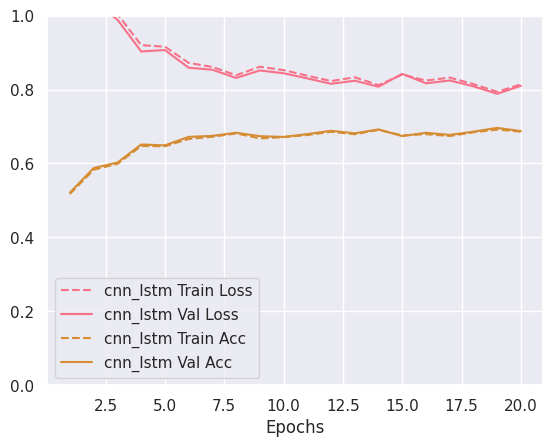

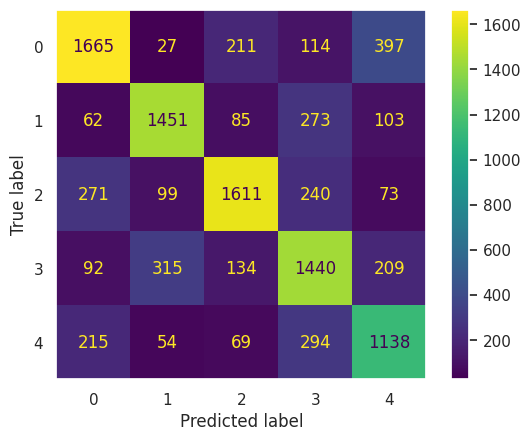

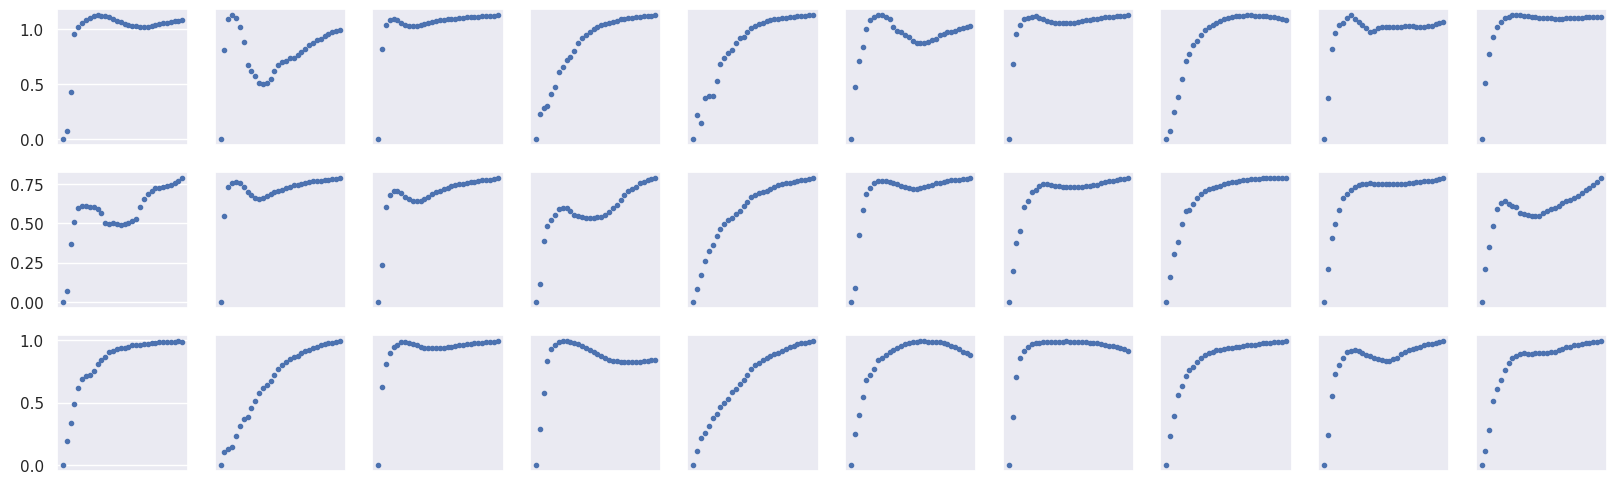

In [3]:
# Look at stardard cnn_lstm for 3 signals
from peratouch.data import Data 
from peratouch.trainer import Trainer
from peratouch.results import Results 
from peratouch.networks import cnn_lstm
from peratouch.config import path_five_users_main 

D = Data(path_five_users_main, triggers=True, releases=False)
D.group_presses()
D.split()
D.normalize()
D.tensors_to_device()
D.print_shapes()
model = cnn_lstm(n_ch=3, n_filters=8, hidden_lstm=16) 
T = Trainer(D)
T.setup(model, batch_size=5000, max_epochs=20, verbose=True)
T.train_model(model)
T.plot_train()

R = Results(D, model)
R.test_metrics(report=True, conf_matrix=True)
R.find_most_uncertain_preds()

Train, test and validation arrays normalized to:
[1. 1. 1.], [0.9991 1.0002 1.0004], [1.0019 1.0013 1.0018]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (114041, 3, 32) 
Labels shape:  (114041,) 
Shape of test set: (11404, 3, 32) 
Shape of train set: (91232, 3, 32) 
Shape of validation set: (11405, 3, 32) 
Unique labels:  [0 1 2 3 4] 
Fraction of test labels:  [0.23, 0.18, 0.21, 0.21, 0.17] 
Fraction of validation labels:  [0.22, 0.18, 0.21, 0.21, 0.17] 
Fraction of train labels:  [0.22, 0.18, 0.21, 0.21, 0.17] 
dtype of inputs:  torch.float32
End of epoch 1: loss_tr=1.441, loss_val=1.442, train=38.3%, val=37.9%
End of epoch 3: loss_tr=1.245, loss_val=1.245, train=49.8%, val=49.9%
End of epoch 5: loss_tr=1.088, loss_val=1.086, train=56.0%, val=56.2%
End of epoch 7: loss_tr=0.995, loss_val=0.991, train=60.7%, val=61.1%
End of epoch 9: loss_tr=0.979, loss_val=0.973, train=61.3%, val=61.8%
End of epoch 11: loss_tr=0.931, loss_val=0.924, train=63.6%, val=64.4%
End of epoch 

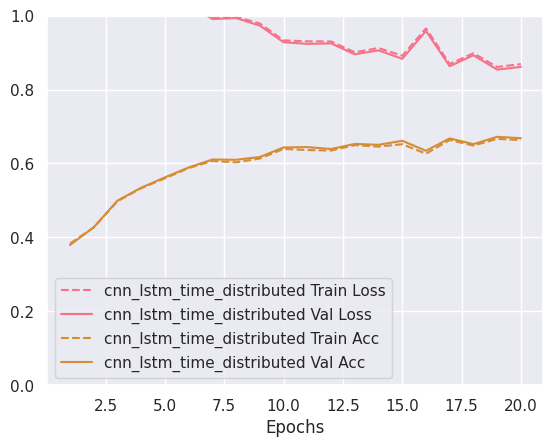

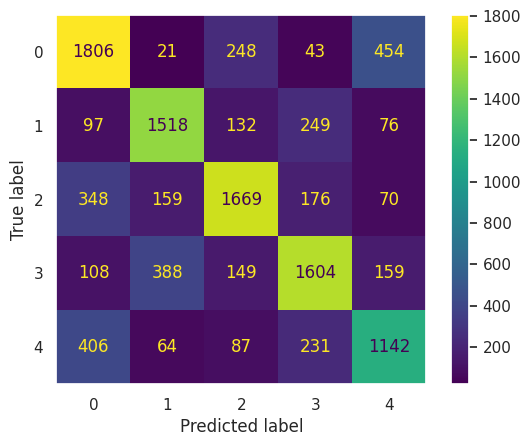

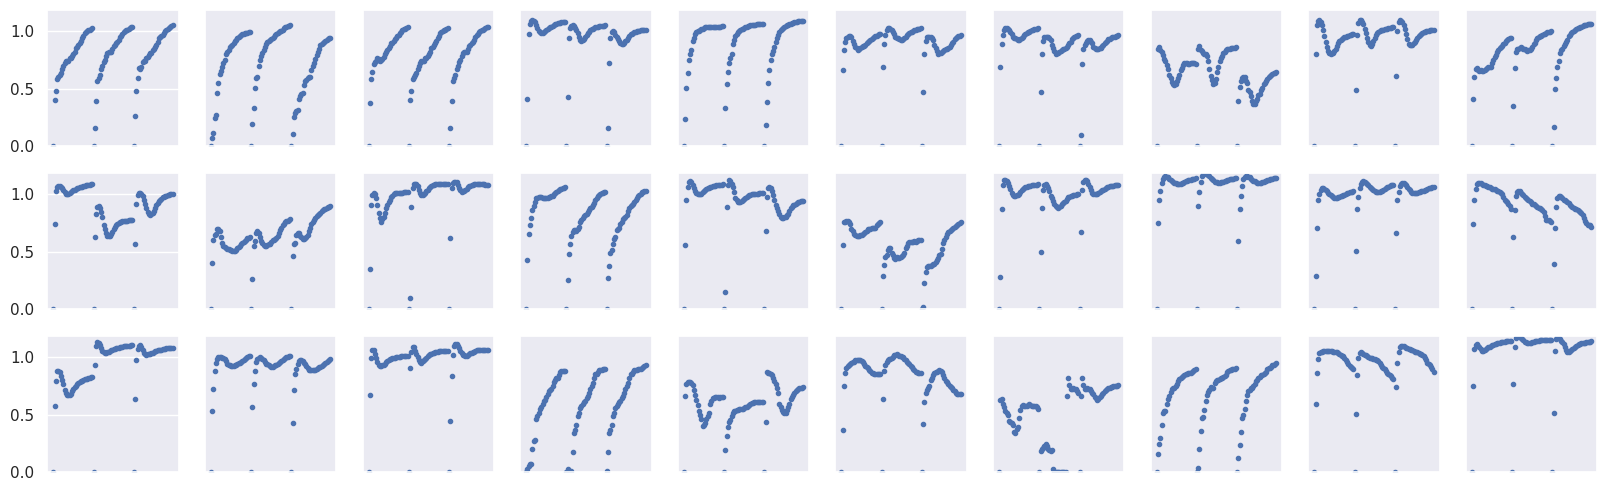

In [2]:
# # Case of time-distributed cnn-lstm 
# from peratouch.data import Data 
# from peratouch.trainer import Trainer
# from peratouch.results import Results 
# from peratouch.networks import cnn_lstm_time_distributed
# from peratouch.config import path_five_users_main 
#
# input_size = 32 
# D = Data(path_five_users_main, triggers=True, releases=False)
# D.group_presses()
# D.split()
# D.normalize()
# D.reshape_for_lstm(input_size=input_size, sliding=False)
# D.tensors_to_device()
# D.print_shapes()
# model = cnn_lstm_time_distributed(input_size=input_size, out_size=5, global_pool=False) 
# T = Trainer(D)
# T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=5000, max_epochs=20)
# T.train_model(model)
# T.plot_train()
#
# R = Results(D, model)
# R.test_metrics(report=True, conf_matrix=True)
# R.find_most_uncertain_preds()